In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("imputed_dataframe.csv")

In [3]:
file_names = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv'
]
dfs = [pd.read_csv(file_name) for file_name in file_names]
df = pd.concat(dfs)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [7]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
PM10                    0.788237
CO                      0.112782
DEWP                    0.021239
SO2                     0.015936
TEMP                    0.012639
NO2                     0.010807
PRES                    0.010653
O3                      0.008489
WSPM                    0.005648
station_Dingling        0.001781
station_Gucheng         0.001383
station_Changping       0.001251
station_Dongsi          0.001082
station_Aotizhongxin    0.000727
wd_SSE                  0.000523
station_Guanyuan        0.000517
RAIN                    0.000495
wd_ESE                  0.000476
wd_NW                   0.000473
wd_E                    0.000465
wd_N                    0.000429
wd_NNE                  0.000417
wd_NE                   0.000412
wd_WSW                  0.000394
wd_SW                   0.000382
wd_ENE                  0.000379
wd_SSW                  0.000363
wd_SE                   0.000351
wd_S                    0.000350
wd_NNW    

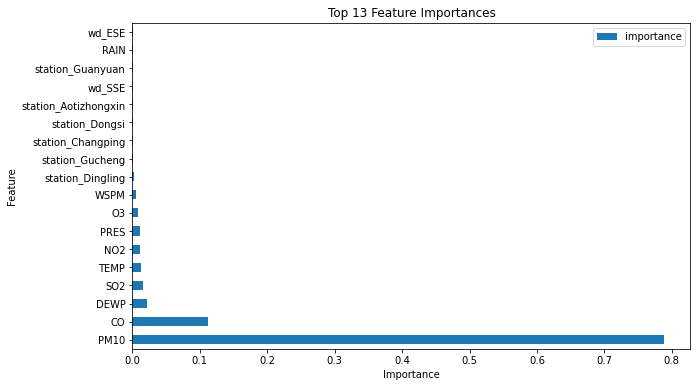

In [19]:
top_features = feature_importances.sort_values('importance', ascending=False).iloc[:18, :]

# Create a horizontal bar plot of the top 13 features
fig, ax = plt.subplots(figsize=(10, 6))
top_features.plot.barh(ax=ax)

# Set plot title and axis labels
ax.set_title('Top 13 Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()


In [22]:
features = ['PM10', 'CO', 'DEWP', 'SO2', 'TEMP', 'NO2', 'PRES', 'O3', 'WSPM']

In [23]:
df[features].to_csv('imputed_dataframe.csv', index=False)

,PM10,CO,DEWP,SO2,TEMP,NO2,PRES,O3,WSPM
0,4.0,300.0,-18.8,4.0,-0.7,7.0,1023.0,77.0,4.4
1,8.0,300.0,-18.2,4.0,-1.1,7.0,1023.2,77.0,4.7
2,7.0,300.0,-18.2,5.0,-1.1,10.0,1023.5,73.0,5.6
3,6.0,300.0,-19.4,11.0,-1.4,11.0,1024.5,72.0,3.1
4,3.0,300.0,-19.5,12.0,-2.0,12.0,1025.2,72.0,2.0
...,...,...,...,...,...,...,...,...,...
210379,58.0,500.0,-17.0,4.0,12.8,19.0,1009.9,56.0,3.1
210380,83.0,700.0,-15.5,6.0,11.1,60.0,1010.4,26.0,1.9
210381,37.0,600.0,-15.9,7.0,10.5,52.0,1010.8,27.0,2.3
210382,23.0,400.0,-14.9,3.0,8.9,13.0,1010.9,57.0,1.6
